In [1]:
import math

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from cascid.configs import pad_ufes


In [2]:
df = pd.read_csv(pad_ufes.METADATA)
df.head().transpose()

,0,1,2,3,4
patient_id,PAT_1516,PAT_46,PAT_1545,PAT_1989,PAT_684
lesion_id,1765,881,1867,4061,1302
smoke,NaN,False,NaN,NaN,False
drink,NaN,False,NaN,NaN,True
background_father,NaN,POMERANIA,NaN,NaN,POMERANIA
background_mother,NaN,POMERANIA,NaN,NaN,POMERANIA
age,8,55,77,75,79
pesticide,NaN,False,NaN,NaN,False
gender,NaN,FEMALE,NaN,NaN,MALE
skin_cancer_history,NaN,True,NaN,NaN,True


In [3]:
df_melanoma = df[df["diagnostic"] == "MEL"]
df_melanoma.head().transpose()

,53,86,112,164,262
patient_id,PAT_680,PAT_995,PAT_966,PAT_966,PAT_495
lesion_id,1289,1867,1825,1825,941
smoke,True,False,False,False,False
drink,False,False,False,False,False
background_father,PORTUGAL,UNK,POMERANIA,POMERANIA,POMERANIA
background_mother,ITALY,UNK,POMERANIA,POMERANIA,POMERANIA
age,78,49,46,46,58
pesticide,False,False,False,False,True
gender,MALE,FEMALE,FEMALE,FEMALE,MALE
skin_cancer_history,True,False,False,False,False


In [4]:
# Hand-picked images containing hairs
hair_ids = [
    "PAT_691", "PAT_320", "PAT_109", "PAT_356", "PAT_681", "PAT_167",
    "PAT_2109", "PAT_245", "PAT_633"
]


In [5]:
df_hair_test = df[df["patient_id"].isin(hair_ids)]
df_hair_test.head().transpose()

,170,201,274,434,447
patient_id,PAT_691,PAT_167,PAT_691,PAT_109,PAT_691
lesion_id,1311,258,3994,868,1310
smoke,False,False,False,True,False
drink,True,False,True,True,True
background_father,POMERANIA,GERMANY,POMERANIA,ITALY,POMERANIA
background_mother,GERMANY,GERMANY,GERMANY,ITALY,GERMANY
age,56,58,56,82,56
pesticide,True,True,True,True,True
gender,MALE,MALE,MALE,MALE,MALE
skin_cancer_history,False,True,False,False,False


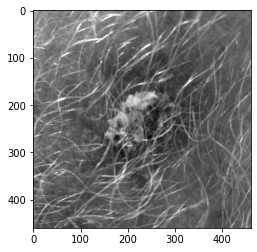

In [65]:
filename = df_hair_test['img_id'].iloc[0]
filename = str(pad_ufes.IMAGES_DIR / filename)
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

In [66]:
from skimage import feature

In [89]:
H_elems = feature.hessian_matrix(img, sigma=1, order='rc')
result = feature.hessian_matrix_eigvals(H_elems)

In [90]:
for item in result:
    print(np.min(item), np.max(item))

-0.05477210157650035 0.10196827379601363
-0.14401894920657776 0.036226636206004935


In [91]:
img_black_hair = result[0]
img_black_hair[img_black_hair < 0] = 0

img_white_hair = -result[1]
img_white_hair[img_white_hair < 0] = 0

In [92]:
img_paper_black_hair = (3.0 * result[0] + result[1]) / 2.0
img_paper_white_hair = (3.0 * result[1] + result[0]) / 2.0


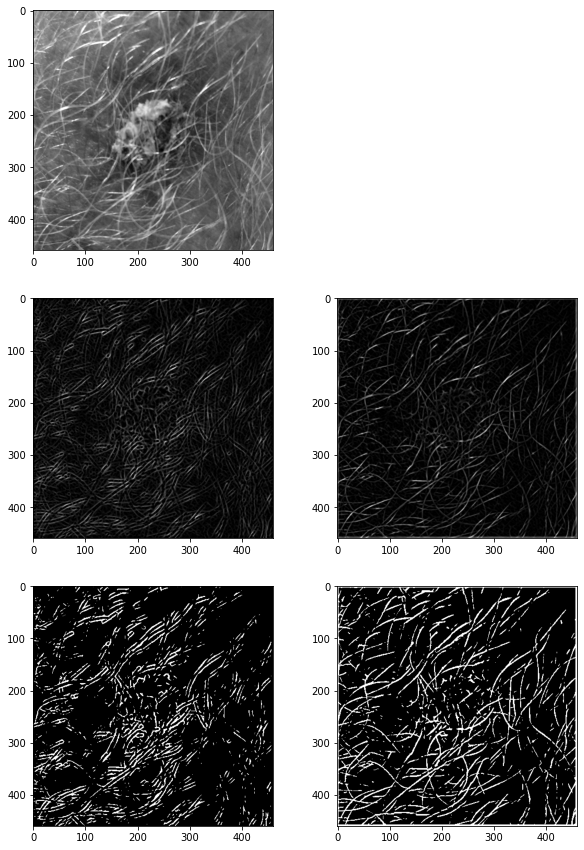

In [99]:
plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(3, 2, 3)
plt.imshow(img_black_hair, cmap='gray')
plt.subplot(3, 2, 4)
plt.imshow(img_white_hair, cmap='gray')
plt.subplot(3, 2, 5)
plt.imshow(result[0] > 0.02, cmap='gray')
plt.subplot(3, 2, 6)
plt.imshow(result[1] < -0.02, cmap='gray')
plt.show()
